# Threshold Selection and Calibration

Objective: Select operational thresholds and evaluate the model’s calibration and performance at the chosen cutoff.

In [1]:
import os
import sys
import pandas as pd 
import joblib

sys.path.append(os.path.abspath(".."))

from src.config import TARGET
from src.evaluation import select_thresholds, evaluate_threshold, evaluate_subgroups
from src.visualization import plot_confusion_matrix_threshold, plot_metrics_barplot

In [2]:
# Load test data
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")[TARGET]

# Load final calibrated model
model = joblib.load("../models/final_pipeline.joblib")

# Compute predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]
pd.DataFrame({"y_prob": y_prob}).to_csv("../reports/tables/y_prob_test.csv", index=False)

In [3]:
# Thresholds
thr = select_thresholds(y_test, y_prob)

df_thr = pd.DataFrame([thr]).round(4)
df_thr.to_csv("../reports/tables/thresholds.csv", index=False)
df_thr

,youden,cost_based,top_k
0,0.4951,0.1486,0.8245


In [4]:
# Evaluate threshold
res = evaluate_threshold(y_test, y_prob, thr["youden"])
df_res = pd.DataFrame([res]).round(4)
df_res.to_csv("../reports/tables/threshold_evaluation_youden.csv", index=False)
df_res

,threshold,TP,FP,FN,TN,sensitivity,specificity,PPV,NPV,F1
0,0.4951,4699,1696,2105,5253,0.6906,0.7559,0.7348,0.7139,0.712


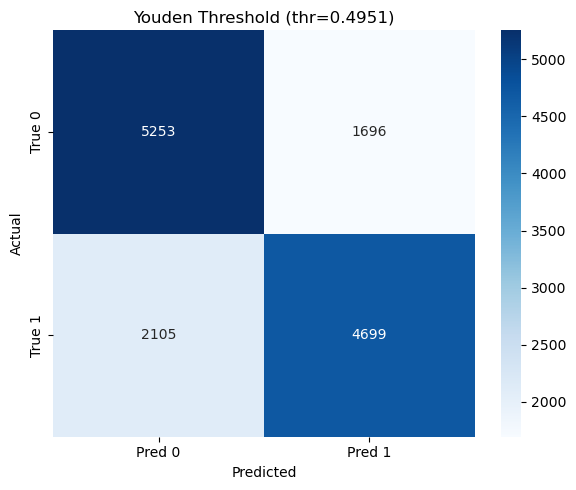

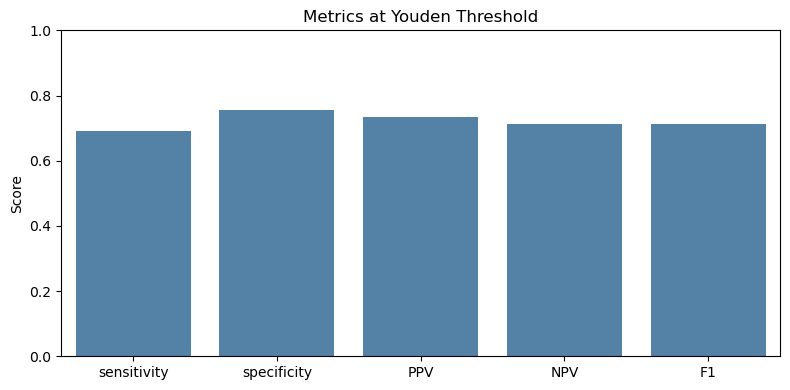

In [5]:
# Plot confusion matrix
fig = plot_confusion_matrix_threshold(y_test, y_prob, thr["youden"], title="Youden Threshold")
fig.savefig("../reports/figures/confusion_matrix_youden.png", dpi=300)

# Plot metrics barplot
fig = plot_metrics_barplot(res, title="Metrics at Youden Threshold")
fig.savefig("../reports/figures/metrics_youden.png", dpi=300)

At this threshold, the model achieves a balanced performance, with solid precision and specificity and an overall **F1 score of 0.71**.